# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [31]:
import numpy as np
D = np.loadtxt('C:/Users/Professional/Documents/GitHub/clf_Maximkin_2020/data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

# 1

In [ ]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) 
Y = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)

In [ ]:
import torch.nn
import torch
from torch.optim import SGD

In [7]:
inputs = torch.from_numpy(X)
outputs = torch.from_numpy(np.expand_dims(Y, axis=1))
train_ds = torch.utils.data.TensorDataset(inputs, outputs)
batch_size = 16
train_dl = torch.utils.data.DataLoader(train_ds, batch_size)

In [8]:
losses = []
for a in np.linspace(0,0.003,100):
    print("alpha: ", a)
    model = torch.nn.Linear(4,1)
    model = model.double()
    mse = torch.nn.functional.mse_loss
    optim = SGD(model.parameters(), lr=0.001)
    num_epochs = 1000
    for epoch in range(num_epochs):
        if epoch%100==0:
            print("epoch: ", epoch)
        for xb,yb in train_dl:
            pred = model(xb)
            l2_reg = torch.tensor(0.)
            for param in model.parameters():
                l2_reg += param.norm(2)
            loss = mse(pred, yb) + a * l2_reg

            loss.backward()
            optim.step()
            optim.zero_grad()
    losses.append(mse(model(inputs.double()), outputs.double()).item())

alpha:  0.0
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  3.0303030303030302e-05
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  6.0606060606060605e-05
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  9.09090909090909e-05
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.00012121212121212121
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.00015151515151515152
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.0001818181818181818
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epo

epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.001696969696969697
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.0017272727272727272
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.0017575757575757575
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.001787878787878788
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.0018181818181818182
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.0018484848484848484
epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400
epoch:  500
epoch:  600
epoch:  700
epoch:  800
epoch:  900
alpha:  0.0018787878787878787
epoch:  0
epoch:  100
ep

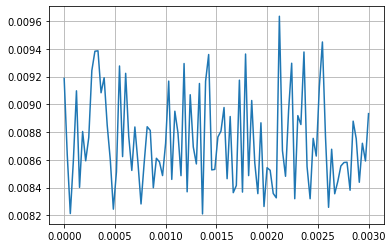

In [18]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0,0.003,100), losses)
plt.grid()
plt.show()

In [19]:
np.linspace(0,0.003,100)[losses.index(min(losses))]

0.0013636363636363635

# 2

In [23]:
idxs = [0, 200, 400, 600, 800, 1000]
kfold_losses = []
train_losses = []
valid_losses = []
for i in range(len(idxs)-1):
    print(idxs[i])
    test_X = inputs[idxs[i]:idxs[i+1]]
    test_Y = outputs[idxs[i]:idxs[i+1]]
    if i==0:
        train_X = inputs[idxs[i+1]:]
        train_Y = outputs[idxs[i+1]:]
    else:
        train_X = torch.cat((inputs[:idxs[i]], inputs[idxs[i+1]:]), dim=0)
        train_Y = torch.cat((outputs[:idxs[i]], outputs[idxs[i+1]:]), dim=0)
    lss = []
    train_ds = torch.utils.data.TensorDataset(train_X, train_Y)   
    batch_size = 20
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size)
    for a in np.linspace(0,0.003,51):
        model = torch.nn.Linear(4,1)
        model = model.double()
        mse = torch.nn.functional.mse_loss
        optim = SGD(model.parameters(), lr=0.001)
        num_epochs = 100
        t_loss = []
        v_loss = []
        for epoch in range(num_epochs):
            for xb,yb in train_dl:
                pred = model(xb)
                l2_reg = torch.tensor(0.)
                for param in model.parameters():
                    l2_reg += param.norm(2)
#                 print(l2_reg, a, mse(pred, yb))
                loss = mse(pred, yb) + a * l2_reg

                loss.backward()
                optim.step()
                optim.zero_grad()
                if (epoch+ 1) % 10 == 0:
                    train_loss = mse(train_Y.double(), model(train_X.double())).item()
                    val_loss = mse(test_Y.double(), model(test_X.double())).item()

                    t_loss.append(train_loss)
                    v_loss.append(val_loss)
                    
        train_losses.append(t_loss)
        valid_losses.append(v_loss)
        
        lss.append(mse(model(test_X.double()), test_Y.double()).item())
        
    kfold_losses.append(lss)

0
200
400
600
800


# 3 Средние значения ошибки для сетки параметра

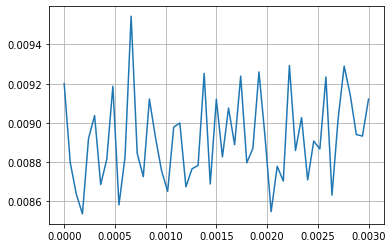

In [24]:
plt.plot(np.linspace(0,0.003,51),np.array(kfold_losses).mean(axis=0))
plt.grid()
plt.show()

In [25]:
mean_losses = np.array(kfold_losses).mean(axis=0)
np.linspace(0,0.003,51)[np.argmin(mean_losses)]

0.00018

# 4

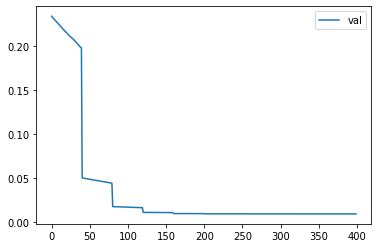

In [30]:
ticks = np.arange(400)

plt.plot(ticks, np.array(valid_losses).mean(axis=0), label='val')

plt.legend()

# 5

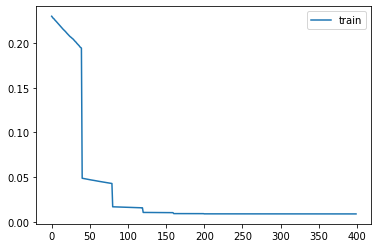

In [29]:
plt.plot(ticks, np.array(train_losses).mean(axis=0), label='train')

plt.legend()